## GDP per Capita for South Asia 

In [2]:
#Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [3]:
#Import CSV

file = "Resources/merged_data.csv"
read_csv = pd.read_csv(file)
read_csv

,Country,Year,Value,Population Size,2020 GDP in USD,GDP Per Capita
0,Afghanistan,2020,5.477190e+07,3.892834e+07,2.011614e+10,516.747871
1,Albania,2020,1.290490e+07,2.837849e+06,1.513187e+10,5332.160475
2,Algeria,2020,2.019923e+08,4.385104e+07,1.450092e+11,3306.858208
3,Angola,2020,8.429773e+07,3.286627e+07,5.361907e+10,1631.431691
4,Antigua and Barbuda,2020,2.155450e+05,9.792800e+04,1.370281e+09,13992.744480
...,...,...,...,...,...,...
162,Uzbekistan,2020,1.278343e+08,3.423205e+07,5.989431e+10,1749.655815
163,Vanuatu,2020,1.115324e+06,3.071500e+05,8.968279e+08,2919.836800
164,World,2020,4.926536e+10,7.763933e+09,8.490681e+13,10936.057466
165,Zambia,2020,6.294596e+07,1.838396e+07,1.811063e+10,985.132436


In [4]:
#Filter out countries in South Asia Region

countries = read_csv[read_csv['Country'].isin(['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Nepal', 'Pakistan', 'Sri Lanka'])].reset_index(drop=True)
countries


,Country,Year,Value,Population Size,2020 GDP in USD,GDP Per Capita
0,Afghanistan,2020,5.477190e+07,3.892834e+07,2.011614e+10,516.747871
1,Bangladesh,2020,5.330869e+08,1.646894e+08,3.739021e+11,2270.347535
2,Bhutan,2020,2.096207e+06,7.716120e+05,2.315436e+09,3000.777986
3,India,2020,2.472701e+09,1.380004e+09,2.667688e+12,1933.101069
4,Nepal,2020,1.353131e+08,2.913681e+07,3.343367e+10,1147.471971
5,Pakistan,2020,1.804460e+09,2.208923e+08,3.003063e+11,1359.514522
6,Sri Lanka,2020,3.737842e+07,2.191900e+07,8.096968e+10,3694.040948


In [5]:
countries_2 = countries.groupby(['Country']).max('GDP Per Capita')
countries_df = pd.DataFrame(countries_2)
countries_df

,Year,Value,Population Size,2020 GDP in USD,GDP Per Capita
Country,,,,,
Afghanistan,2020,5.477190e+07,3.892834e+07,2.011614e+10,516.747871
Bangladesh,2020,5.330869e+08,1.646894e+08,3.739021e+11,2270.347535
Bhutan,2020,2.096207e+06,7.716120e+05,2.315436e+09,3000.777986
India,2020,2.472701e+09,1.380004e+09,2.667688e+12,1933.101069
Nepal,2020,1.353131e+08,2.913681e+07,3.343367e+10,1147.471971
Pakistan,2020,1.804460e+09,2.208923e+08,3.003063e+11,1359.514522
Sri Lanka,2020,3.737842e+07,2.191900e+07,8.096968e+10,3694.040948


# 2020 GDP per Capita

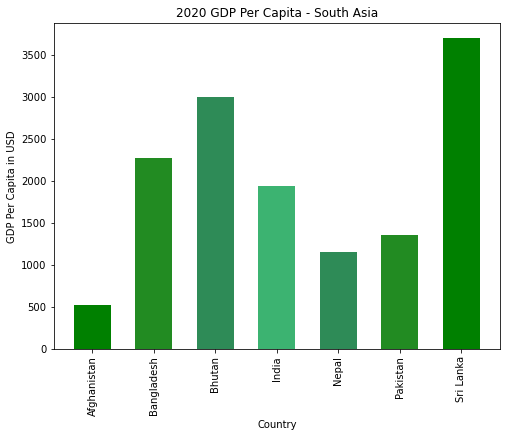

In [22]:
#Bar graph displaying 2020 GDP per Capita 

# #Pyplot
countries = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Nepal', 'Pakistan', 'Sri Lanka']
countries_2 = countries_df.groupby('Country')['GDP Per Capita'].sum()
x_axis = np.arange(len(countries_2))
ticks = [value+0.3 for value in x_axis]
colors = ['green', 'forestgreen', 'seagreen', 'mediumseagreen', 'seagreen', 'forestgreen', 'green']

# #Create a list indicating where to write x labels and set figure size
plt.figure(figsize=(8,6))
plt.bar(x_axis, countries_2, color=colors, alpha=1, align='edge', width=0.6)
plt.xticks(ticks, countries, rotation='vertical')

# Axis labels and Title
plt.title('2020 GDP Per Capita - South Asia')
plt.xlabel('Country')
plt.ylabel('GDP Per Capita in USD')
plt.savefig('GDP per Capita Bar Chart')

# 2020 Population 

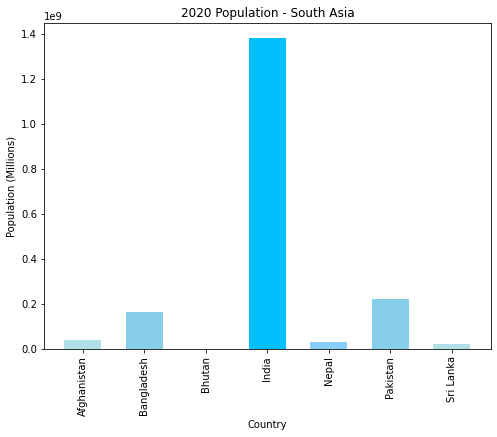

In [21]:
#Bar graph displaying 2020 Population 

# #Pyplot
countries = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Nepal', 'Pakistan', 'Sri Lanka']
countries_2 = countries_df.groupby('Country')['Population Size'].sum()
x_axis = np.arange(len(countries_2))
ticks = [value+0.3 for value in x_axis]
colors = ['powderblue', 'skyblue', 'lightskyblue', 'deepskyblue', 'lightskyblue', 'skyblue', 'powderblue']

# #Create a list indicating where to write x labels and set figure size
plt.figure(figsize=(8,6))
plt.bar(x_axis, countries_2, color=colors, alpha=1, align='edge', width=0.6)
plt.xticks(ticks, countries, rotation='vertical')

# Axis labels and Title
plt.title('2020 Population - South Asia')
plt.xlabel('Country')
plt.ylabel('Population (Millions)')
plt.savefig("Population Bar Chart")

# GDP Pie Chart

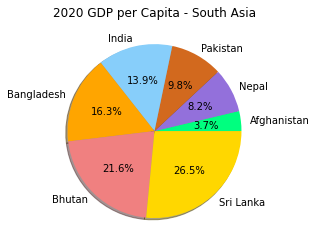

<Figure size 432x288 with 0 Axes>

In [30]:
#Pie chart showing all countries GDP 
pie_plot = countries_df.groupby("GDP Per Capita")
pie_plot

sex = pie_plot['GDP Per Capita'].sum()

labels = ['Afghanistan', 'Nepal', 'Pakistan', 'India', 'Bangladesh', 'Bhutan', 'Sri Lanka']
colors = ["springgreen", "mediumpurple", "chocolate", "lightskyblue","orange", "lightcoral", "gold"]

pie_chart = sex.plot(kind="pie", shadow=True, labels=labels, colors=colors, autopct='%1.1f%%', title="2020 GDP per Capita - South Asia")
pie_chart.set_xlabel("")
pie_chart.set_ylabel("")


plt.show()
plt.tight_layout()
plt.savefig("GDP Pie Chart")